In [238]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, plot_confusion_matrix

# Coleta de Dados
* Busque uma base de dados que seja apropriada para um problema de classificação. A base deve conter pelo menos uma variável dependente e duas ou mais variáveis independentes.

In [239]:
df = pd.read_csv('diabetes2.csv')
df

,Glucose,BloodPressure,Skin Thickness,Insulin,BMI,Age,Outcome
0,148.0,72.0,35.0,NaN,33.6,50,1
1,85.0,66.0,29.0,NaN,26.6,31,0
2,183.0,64.0,NaN,NaN,23.3,32,1
3,89.0,66.0,23.0,94.0,28.1,21,0
4,137.0,40.0,35.0,168.0,43.1,33,1
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,63,0
764,122.0,70.0,27.0,NaN,36.8,27,0
765,121.0,72.0,23.0,112.0,26.2,30,0
766,126.0,60.0,NaN,NaN,30.1,47,1


# Pré-processamento de Dados
* Elementos Faltantes: Preencha ou remova quaisquer elementos faltantes na base de dados (caso existam).
* Variáveis Categóricas: Se houver variáveis categóricas, transforme-as em variáveis numéricas.
* Normalização: Normalize as variáveis se necessário.
* Separação de Dados: Divida a base em conjuntos de treino e teste.

In [240]:
print(f"Elementos faltantes:\n{df.isna().sum()}\n") 
imputer = SimpleImputer(strategy='mean')
df[["Glucose", "BloodPressure", "Skin Thickness", "Insulin", "BMI", "Age"]] = imputer.fit_transform(df[["Glucose", "BloodPressure", "Skin Thickness", "Insulin", "BMI", "Age"]])

print("Não há variáveis categóricas\n")

scaler = MinMaxScaler()
df[["Glucose", "BloodPressure", "Skin Thickness", "Insulin", "BMI", "Age"]] = scaler.fit_transform(df[["Glucose", "BloodPressure", "Skin Thickness", "Insulin", "BMI", "Age"]])

XTrain, XTest, yTrain, yTest = train_test_split(df[["Glucose", "BloodPressure", "Skin Thickness", "Insulin", "BMI", "Age"]], df["Outcome"], test_size = 0.2)

Elementos faltantes:
Glucose             5
BloodPressure      35
Skin Thickness    227
Insulin           374
BMI                11
Age                 0
Outcome             0
dtype: int64

Não há variáveis categóricas



# Modelagem e Treino
* Utilize a base de treino para criar e treinar um modelo de regressão logística usando a scikit-learn.

In [241]:
model = LogisticRegression()
model.fit(XTrain, yTrain)

LogisticRegression()

# Avaliação de Modelo
* Utilize a base de teste para fazer previsões.
* Calcule métricas como a acurácia, precisão, recall e F1-score para avaliar o desempenho do modelo.

In [242]:
yPred = model.predict(XTest)

dfComparacao = pd.DataFrame(yTest)
dfComparacao["Predição"] = yPred
print(dfComparacao)

accuracy = accuracy_score(yTest, yPred) #A acurácia mede a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões. (Acurácia = (Verdadeiros Positivos + Verdadeiros Negativos) / (Verdadeiros Positivos + Falsos Positivos + Verdadeiros Negativos + Falsos Negativos))
precision = precision_score(yTest, yPred) #A precisão mede a proporção de previsões positivas corretas feitas pelo modelo em relação ao total de previsões positivas(falsos positivos).(Precisão = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Positivos))
recall = recall_score(yTest, yPred) #O recall mede a proporção de instâncias positivas reais que foram corretamente identificadas pelo modelo em relação ao total de instâncias positivas reais(falsos negativos).(Recall = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos))
f1 = f1_score(yTest, yPred) #O F1-Score é uma métrica que combina precisão e recall em um único valor. Ele fornece um equilíbrio entre essas duas métricas. (F1-Score = 2 * (Precisão * Recall) / (Precisão + Recall))

print(f"\nAcurácia: {accuracy}\nPrecisão: {precision}\nRecall: {recall}\nF1-score: {f1}")

     Outcome  Predição
64         1         0
299        0         0
472        0         0
331        0         0
155        1         1
..       ...       ...
440        1         1
104        0         0
675        1         1
554        0         0
662        1         1

[154 rows x 2 columns]

Acurácia: 0.7857142857142857
Precisão: 0.8333333333333334
Recall: 0.4716981132075472
F1-score: 0.6024096385542169


# Visualização
* Gere gráficos que mostrem a eficácia do modelo, como curvas ROC ou matrizes de confusão.

/home/Cantarino/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


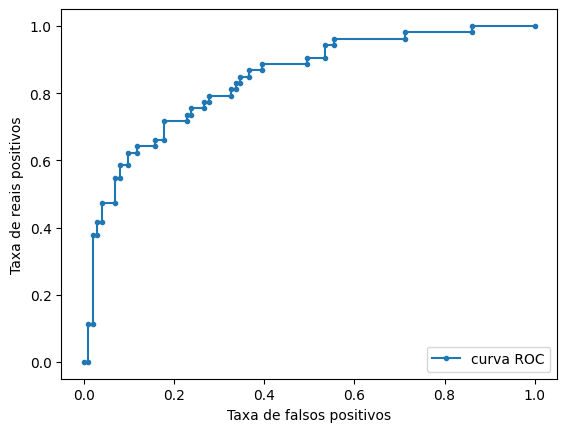

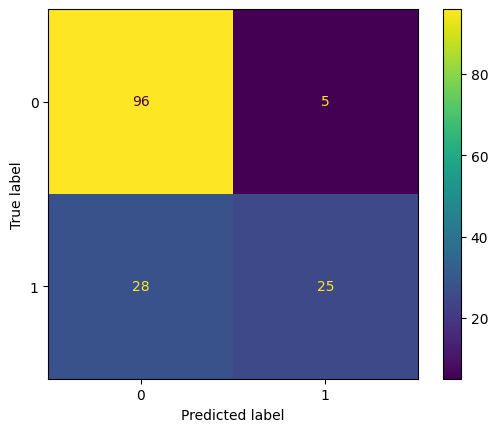

In [243]:
prob = model.predict_proba(XTest)
trueProb = prob[:,1]
fpr, tpr, _ = roc_curve(yTest, trueProb)
#auc = roc_auc_score(yTest, trueProb) #Área de baico da curva | 1 = modelo perfeito; 0,5 = igual acaso
plt.plot(fpr, tpr, marker='.', label= 'curva ROC')
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de reais positivos')
plt.legend(loc='lower right')

plot_confusion_matrix(model, XTest, yTest)

# Relatório

## Coleta de dados:

O banco de dados contém detalhes sobre pacientes, todas mulheres acima de 21 anos. Possui informação sobre alguns dados relacionados a saúde e se elas tem diabetes ou não.objetivo é usar os campos para inferir se os pacientes possuem diabetes ou não.
Os campos são: 
* Nível de glicose
* Valor de pressão arterial
* Espessura da pele
* Nível de insulina
* IMC
* Idade
* Possui diabetes ou não

## Pré-processamento de dados:

* Haviam dados faltantes, que forem preenchidos com a média das colunas. 
* Não haviam dados categóricos.
* Todas as variáveis independetes foram normalizadas.

## Avaliação do modelo:

As métricas obtidas são cerca de:
* Acurácia: 0.7662337662337663
* Precisão: 0.6842105263157895
* Recall: 0.52
* F1-score: 0.5909090909090909

Onde cada métrica funciona da seguinte forma:
* A acurácia mede a proporção de previsões corretas de todas as previsões.
* A precisão mede a proporção de previsões positivas corretas em relação a todas as previsões positivas.
* O recall mede a proporção de instâncias positivas reais corretamente identificadas em relação a todas as instâncias positivas reais.
* O F1-Score é uma métrica de equilíbrio que combina precisão e recall em um único valor.

Quanto mais próximo de 1 esses valores, mais preciso é o modelo. Portanto, esse modelo não é muito preciso ou confiável.